# Lecture 12: Text-to-Speech Synthesis II

## Recap:

TTS Systems' Logic is not that different from Speech Recognition Systems' Logic. We still have (almost) the same subquestions.

1. Latent Symbol Space $\rightarrow$ Diphones
2. The conversion from the latent symbol space (diphones) to speech $\rightarrow$ Atomic Unit Selection (two costs to be optimized) with Pitch-synchronous concatenation (overlap and add) (PSOLA)
3. The conversion from text to that latent symbol space (diphones) $\rightarrow$ NLP
4. Is already embedded in 2. 

This was at the same time of the start of using HMMs in Speech Reocgnition. So what about using HMMs for this task too?

## HMMs for speech Generation

The idea here would be to gather data (much less than the data needed to train a ASR system) (of a speaker), and then adapt the parameters of Gaussians/GMMs (adapt the means). This worked well for speech recognition, this adaptation of the Gaussians/GMMs parameters made the performance of ASR systems improve, meaning they can detect a certain person's speech even better, since a person introduces their own variability. Now this can be coupled with Vocoder systems to produce TTS systems. HMMs here do not to store the unit database, they make it easy to adapt the speech, there are no artefacts from unit joints, produce buzzy/lively speech quality.

### Vocoding

We take a speech signal, we window it, perform LP analysis and extract the coefficients {$a_{k}$}$_{k=1}^{\star}$. Then for each window, we get a residual signal, from which we get whether the signal is voiced or unvoiced, we get $F_{0}$, and we get the gain $\mathcal{G}$. We then transmit this information to the system, that uses this information to pass through a filter, and we get a signal for that given signal. Now we can extract this information, not from speech signals, but rather from the linguistic representation, passed through the acoustic representation, making us go from text to speech. HMMs are by nature generative, but we have used them from an analytical point of view in speech recognition, here we WANT to use their generative features. 

### Linguistic Representation

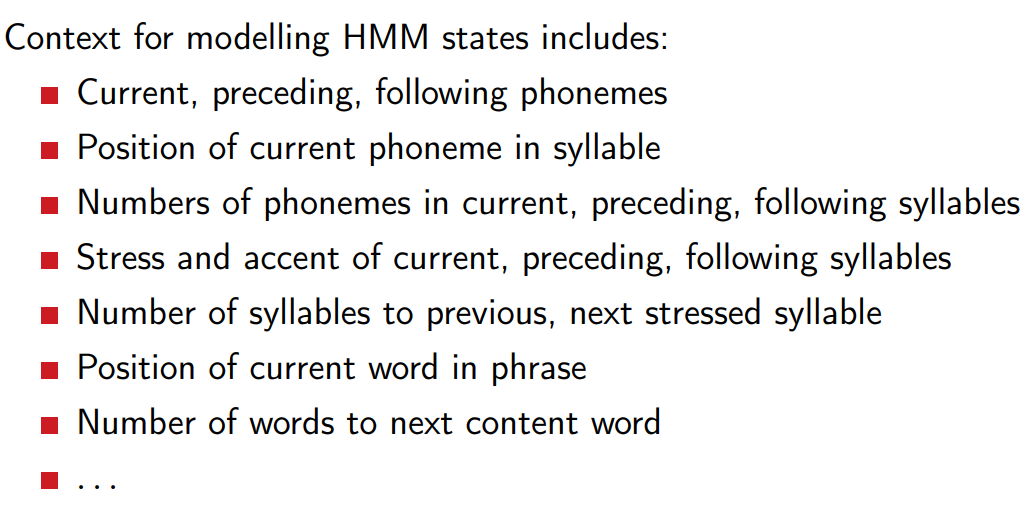

The problem here in the modelling of it is that the latent space is going to be very big, a huge number of dimensions, the same problem was faced in speech recognition, but it was solved using context-dependent phone modelling, we tie the states with the same Gaussians/GMMs. In TTS systems, we would leave them modelled by a single Gaussians. 

$Q_{1}$ is clustered context-dependent phones, each modelled by a single Gaussian.

$Q_{3}$ NLP + decision trees to map the text to the context-depenent phones.

$Q_{2}$ we need to go to the vocoder parameters from the context-dependent phones, because vocoders make it easy to speech synthesis. For this, the shift in the windows was shortened to 5ms instead of 10ms, to get the finer variations.

The second changement came for the HMMs, to generate the vocoder parameters. HMMs can learn durations, for speech recognition HMMs, we had a three-state solution as a minimum duration to not change states, the probability to stay in the same state for less than three durations is 0, and then it is the highest for three durations, and then it decays, but for TTS systems, this does not solve it, because it fixes the duration for every sound, which is not natural. Ideally, what we would like to have is not exponentially decaying, but rather something closer to a gaussian function decaying slowly, so they got rid of the self-foundations, and decided we need an explicit duration distribution model, they started with Gaussians (extra parameter, duration distribution), which makes it no more a HMM, but rather a Hidden Semi-Markov model (HSMM). This way, for each state, we have two distributions, one for the vocal tract {$a_{k}$}, and the other for the source (energy, $F_{0}$) (This replaces the unique distribution for each state, since now we need to learn how this speaker's voice speaks), making a total of three distributions for every single state. 

We sample the duration distribution to get the number of frames, and then that number, we sample the vocal tract distribution and the source distribution the same number of frames (each 5ms-long), to get the corresponding vectors (for the vocal tract and the source), and this way we have our states that go as input for our vocoder, that in its turn generates the speech. Going back to the vocoder, this is us extracting the information necessary for the vocoder to generate the speech signal. 

### Acoustic Representation

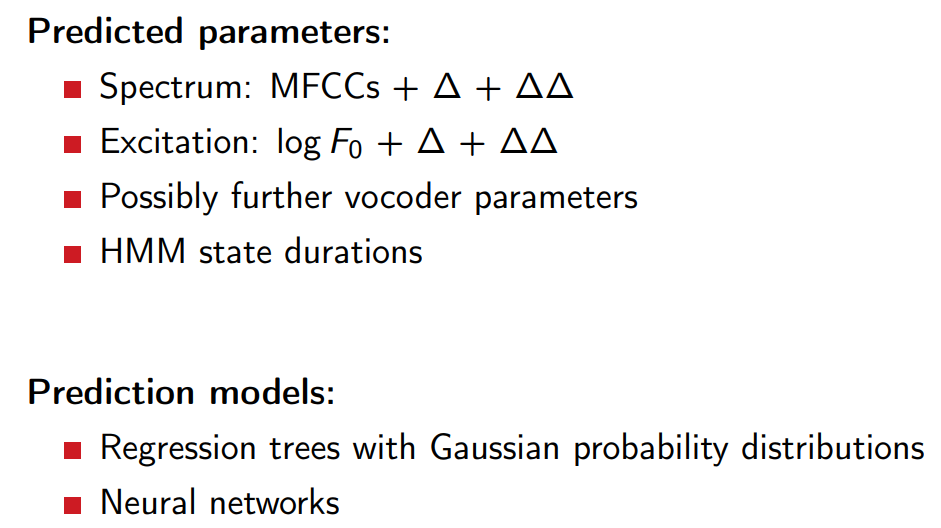

### Going back to the Vocoders

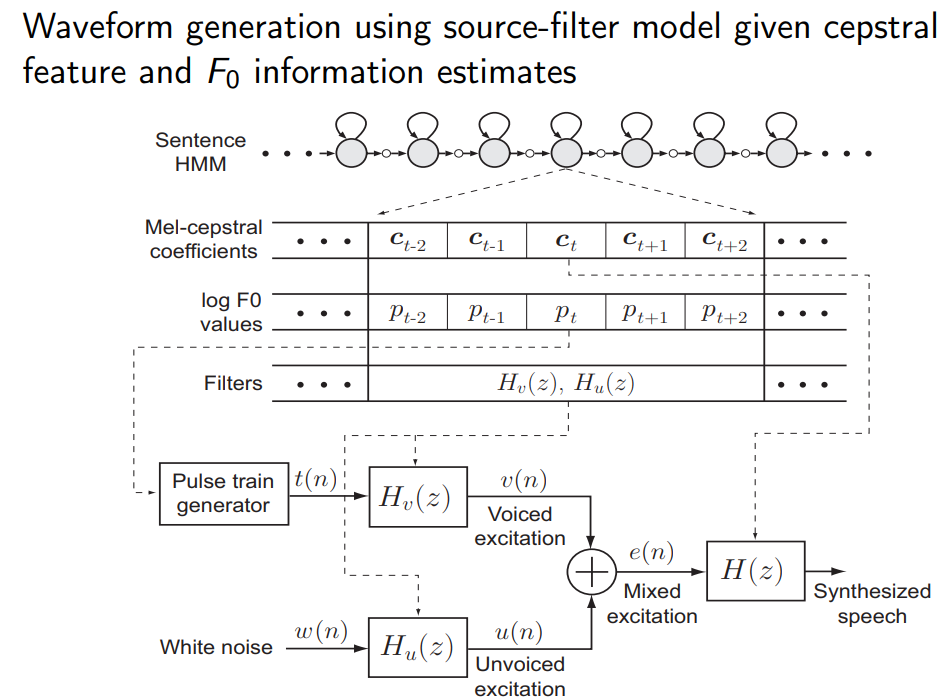

### Speaker Adaptation

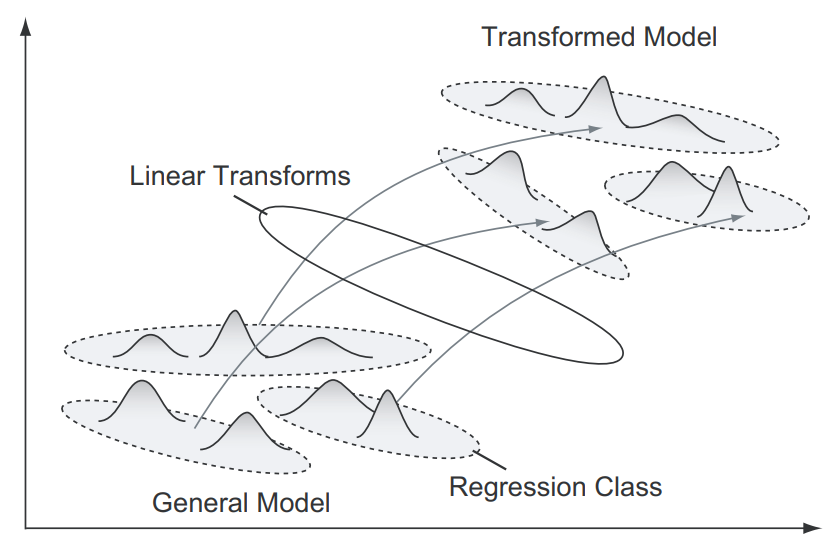

### Overview on the HTS System

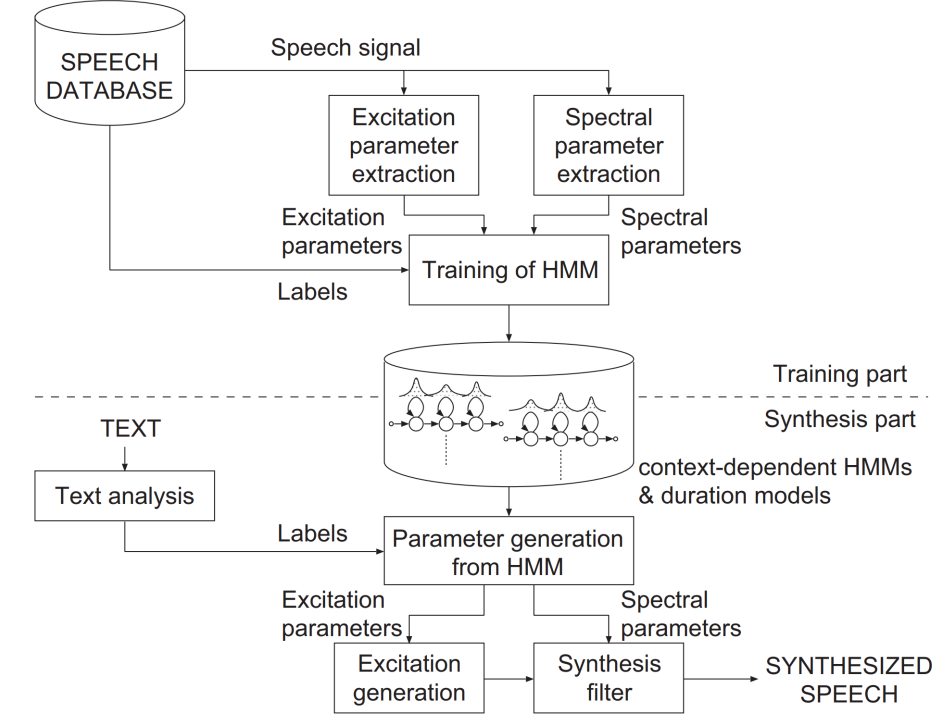

### Summary on the usage of HMMs for ASR vs TTS

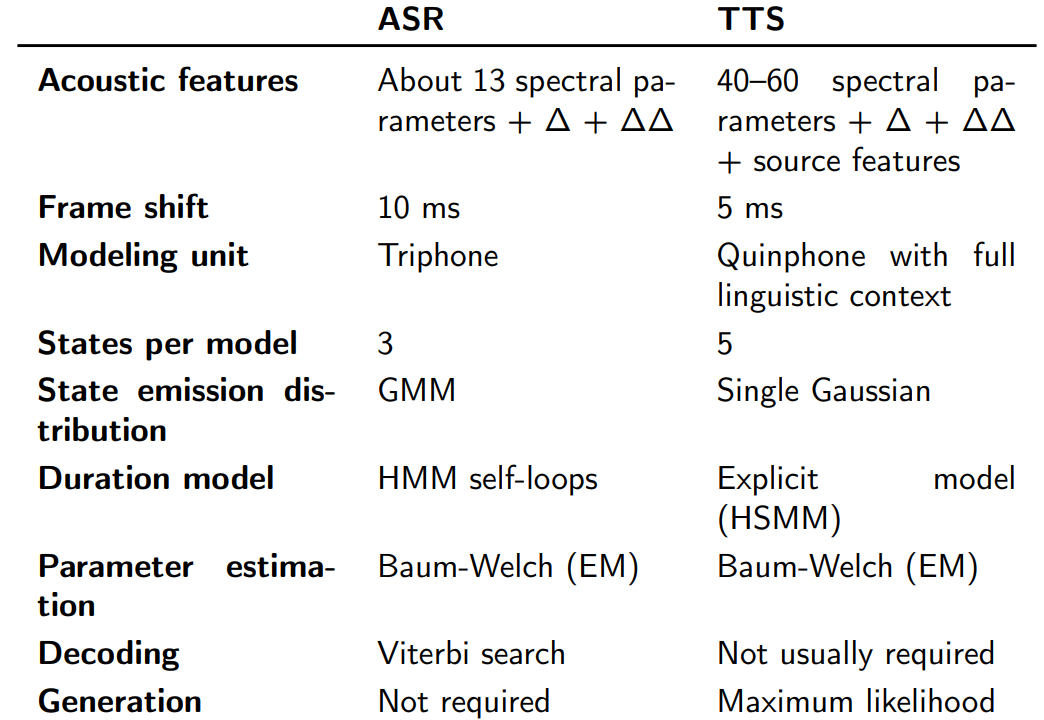

## Hybrid Speech Synthesis

Now people found that HMMs Synthesis is very intelligible, and concatenative synthesis is very natural, so how about combining them?

Instead of using Vocoders, we can go directly with unit concatenation. And we select units based on predicted acoustics parameters, where the targets are generated by HMMs.

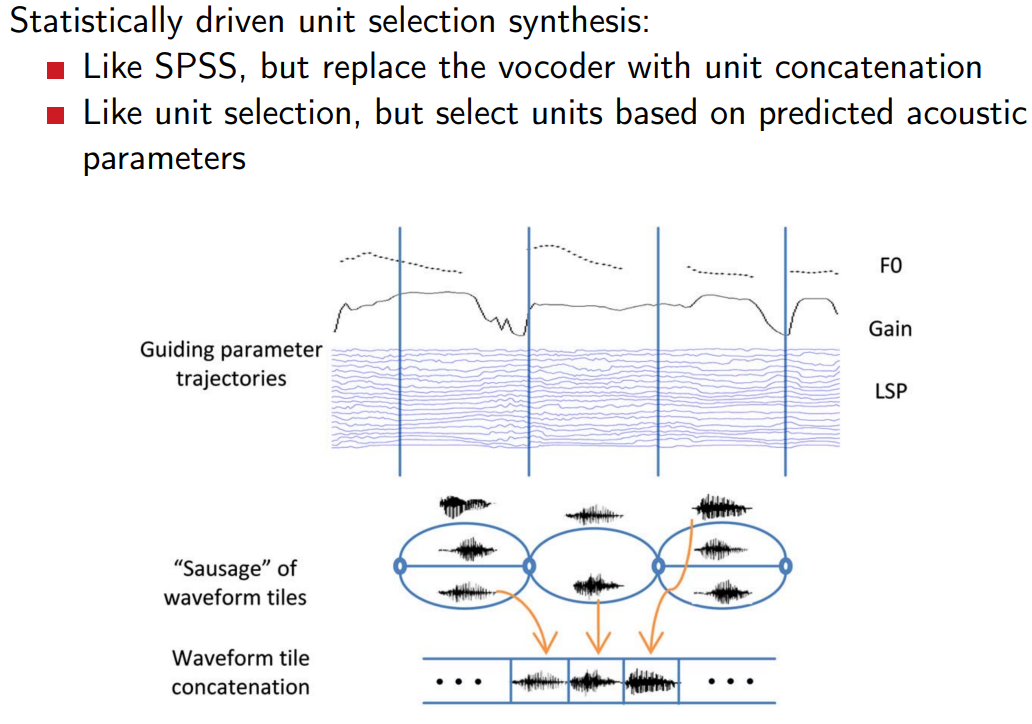

## End-to-End TTS

HMMs-based TTS had a limitation, its training does not cause it to generate speech directly, we still need to go through the other steps in the synthesis part. 

So they got rid of the whole signal processing-based part, and replaced it with a neural vocoder, generating (predicting) directly the speech samples given the acoustic and liguistic features $\mathcal{f}$, not knowledge-driven anymore.

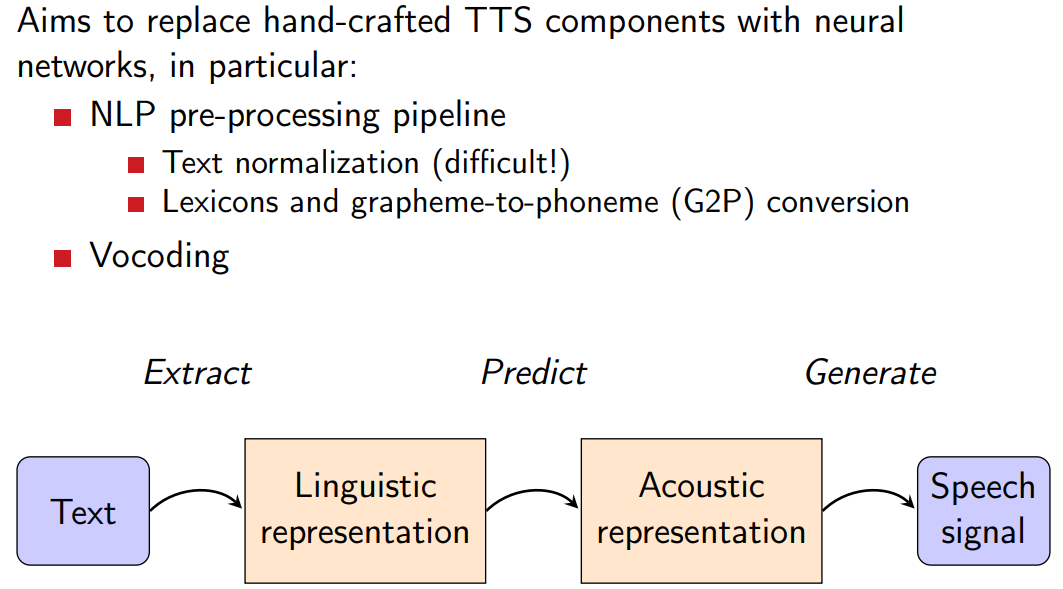

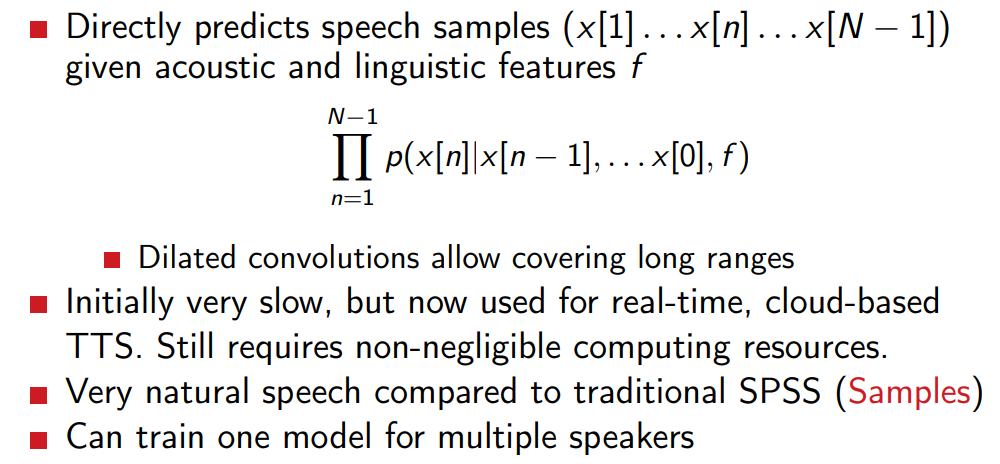

MOS scores improved significantly compared to concatenative synthesis systems, HMMs parametric approach. 

### Implementation

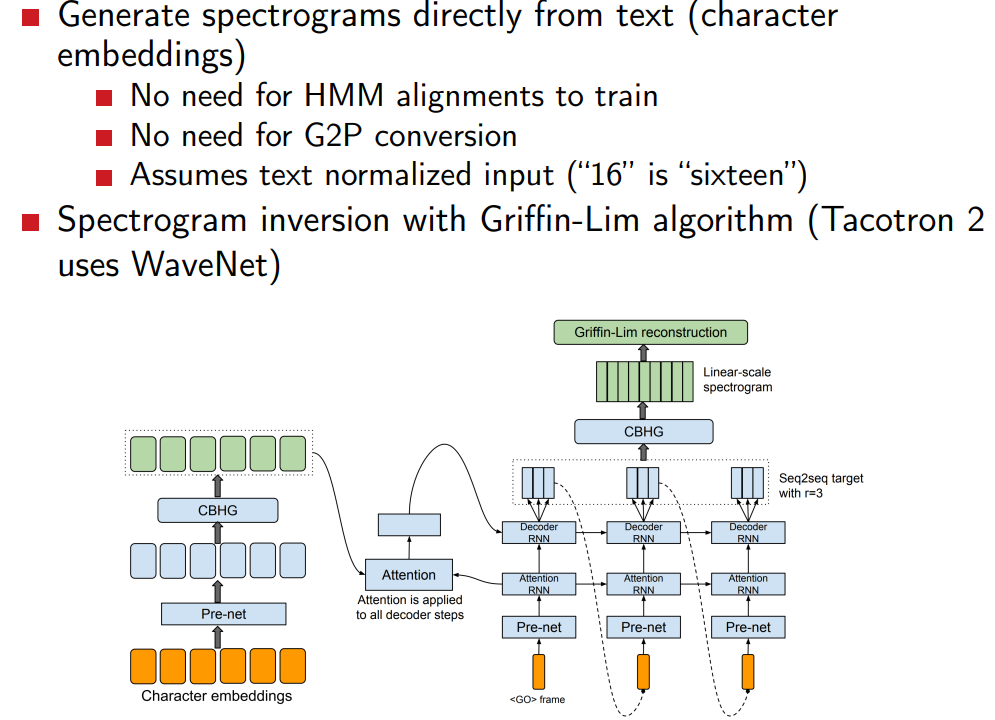

Griffin-Lim, is a signal processing-based method that converts a spectrogram into a signal. 

Text $\rightarrow$ character Embeddings $\rightarrow$ Spectrogram $\rightarrow$ Signal

### Step back to the subquestions

- $Q_{1}$ being Character Embeddings
- $Q_{3}$ being text $\rightarrow$ character embeddings (NLP)
- $Q_{2}$ being character embeddings to signal

We are slowly getting rid of the knowledge, letting the data teach the models.

## TTS Training Data

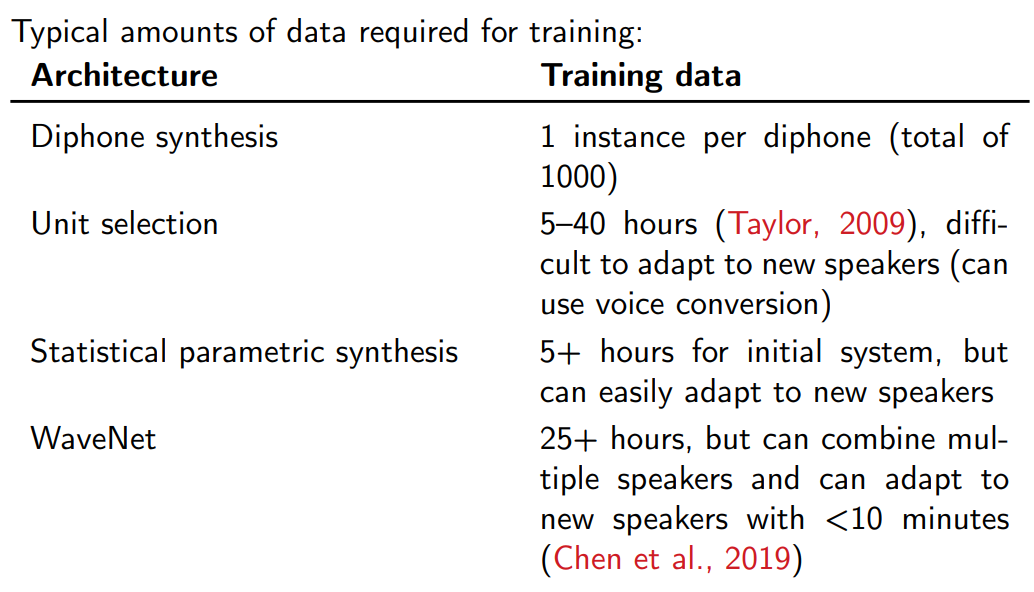

## Evaluating Synthetic Speech

### Subjective vs Objective Evaluation

Subjective $\leftrightarrow$ Human listeners. We would need to have objective methods too.

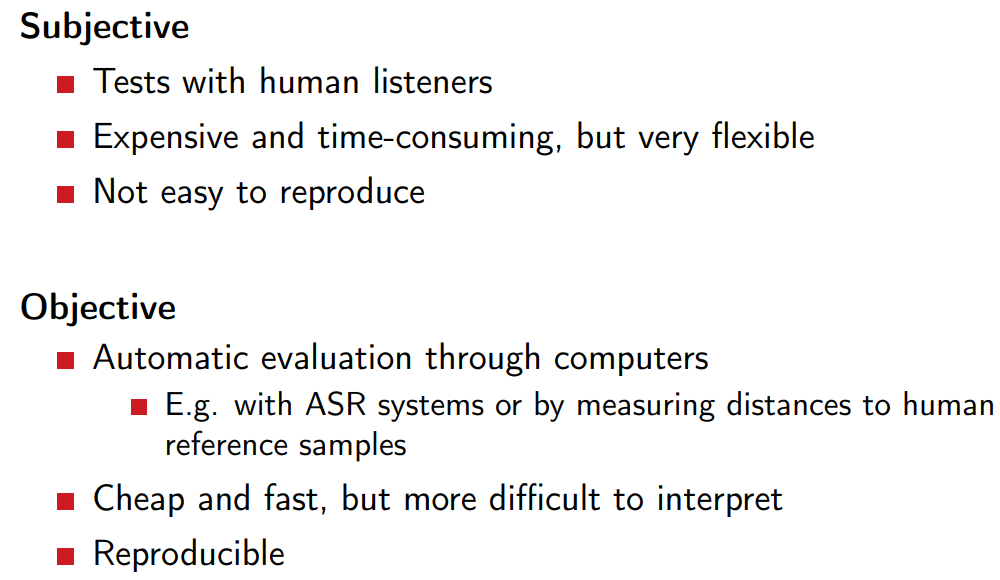

### Naturalness vs Intelligibility

Naturalness is how well the words cannot be known to be AI-generated. Intelligibility is how well words are understandable, recognizable.

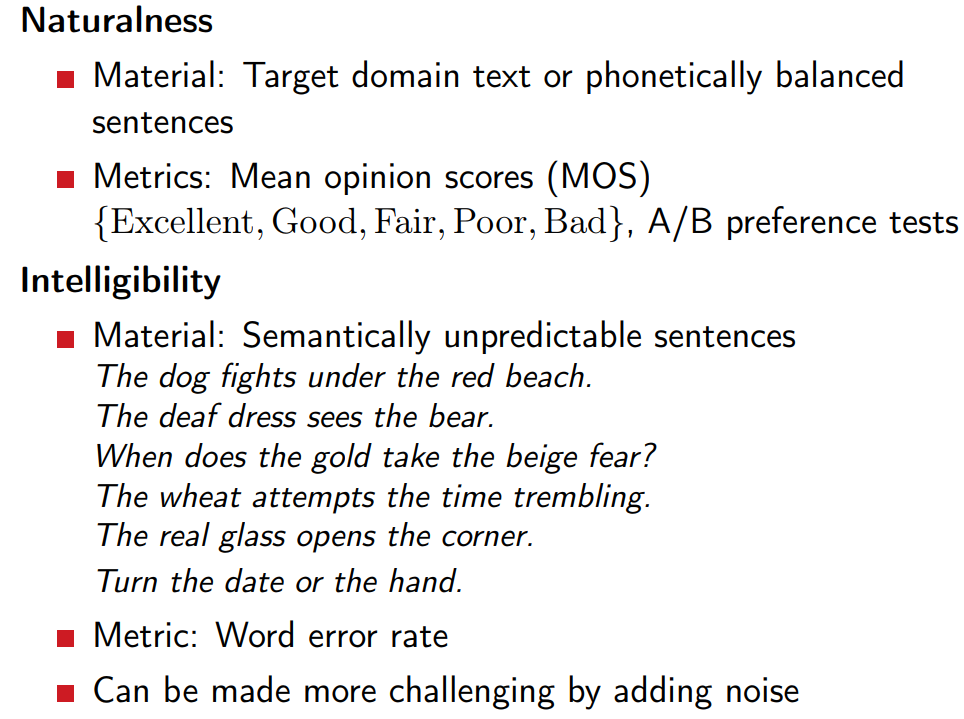

### Other evaluation measures?

Maybe even speaker similarity, how well our system is generating speech that is similar to a certain speaker, vocabulary, emotions, tones, dialect, accent. (we would have to decide what factor we are trying to measure)